In [66]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from datetime import datetime
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
from mlxtend.regressor import StackingRegressor
%matplotlib inline 

In [67]:
successfulVends_raw = pd.read_csv("successfulVENDS2019.csv")
deposit_raw = pd.read_csv("deposit2019.csv")
loan_raw = pd.read_csv("loan2019.csv")

In [68]:
deposit_raw= deposit_raw.rename(index=str,columns={"systemtranstime":"time"})

In [69]:
deposit_raw['time']=pd.to_datetime(deposit_raw.time)

<Figure size 1296x864 with 0 Axes>

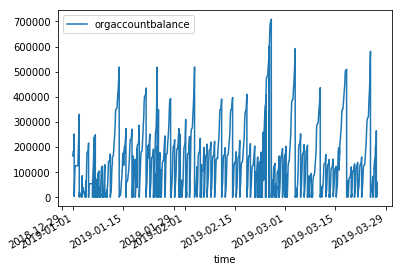

In [70]:
plt.figure(figsize=(18, 12))
deposit_raw.plot(x='time',y='orgaccountbalance')

In [71]:
successfulVends_raw.head()

,address,amount,tokennumber,unit,transactionid,time
0,254793014571,1,05459259559109124256,0.07,M19010106590000185,2019-01-01 06:59:57
1,254707547916,300,09013737004580189848,13.85,M19010207402300001,2019-01-02 07:40:31
2,notfound,100,24470381013794411446,5.28,M19010207410800003,2019-01-02 07:41:16
3,254721590352,900,26082867802943631820,59.37,M19010207405900002,2019-01-02 07:41:12
4,notfound,700,21948249622844601730,46.18,M19010207412200004,2019-01-02 10:41:37


In [72]:
successfulVends_raw['time']=pd.to_datetime(successfulVends_raw.time)


In [73]:
loan_raw['time']=pd.to_datetime(loan_raw.time)

In [74]:
vends = successfulVends_raw.groupby([successfulVends_raw.time.dt.hour,successfulVends_raw.time.dt.date]).sum()
account = deposit_raw.groupby([deposit_raw.time.dt.hour,deposit_raw.time.dt.date]).agg({'orgaccountbalance':'sum'})
loan = loan_raw.groupby([loan_raw.time.dt.hour,loan_raw.time.dt.date]).sum()

In [75]:
loan_raw = loan_raw[['time','amount']]
deposit_raw = deposit_raw[['time','transamount','orgaccountbalance']]
successfulVends_raw= successfulVends_raw[['time','amount']]

In [76]:
account = deposit_raw.resample('60min', on='time').sum()
vends = successfulVends_raw.resample('60min', on='time').sum()
loan = loan_raw.resample('60min', on='time').sum()

In [77]:
positive = vends.add(loan,fill_value=0)

In [78]:
account

,transamount,orgaccountbalance
time,,
2018-12-31 21:00:00,3528.0,3657301.0
2018-12-31 22:00:00,4420.0,1531666.0
2018-12-31 23:00:00,10050.0,1961144.0
2019-01-01 00:00:00,0.0,0.0
2019-01-01 01:00:00,410.0,1095914.0
2019-01-01 02:00:00,2220.0,919980.0
2019-01-01 03:00:00,7210.0,2250968.0
2019-01-01 04:00:00,13229.0,6892296.0
2019-01-01 05:00:00,26707.0,15213042.0


In [79]:
def normalize(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(np.vstack(x))
    return x_scaled


In [80]:
both

,amount,amount,orgaccountbalance
time,,,
2019-01-01 06:00:00,1.0,27575.0,7681466.0
2019-01-01 07:00:00,0.0,28696.0,1447847.0
2019-01-01 08:00:00,0.0,26518.0,3817207.0
2019-01-01 09:00:00,0.0,22305.0,4397425.0
2019-01-01 10:00:00,0.0,10998.0,4817636.0
2019-01-01 11:00:00,0.0,12760.0,5690480.0
2019-01-01 12:00:00,0.0,12844.0,5755238.0
2019-01-01 13:00:00,0.0,0.0,0.0
2019-01-01 14:00:00,0.0,0.0,0.0


In [81]:
both = pd.concat([positive,account], axis=1).dropna()
both['amount']=normalize(both.amount)
both['transamount']=normalize(both.transamount)
both['orgaccountbalance']=normalize(both.orgaccountbalance)

In [82]:
both.head()

,amount,transamount,orgaccountbalance
time,,,
2019-01-01 06:00:00,0.000003,0.193862,0.044202
2019-01-01 07:00:00,0.000000,0.201744,0.008331
2019-01-01 08:00:00,0.000000,0.186431,0.021966
2019-01-01 09:00:00,0.000000,0.156812,0.025304
2019-01-01 10:00:00,0.000000,0.077320,0.027722


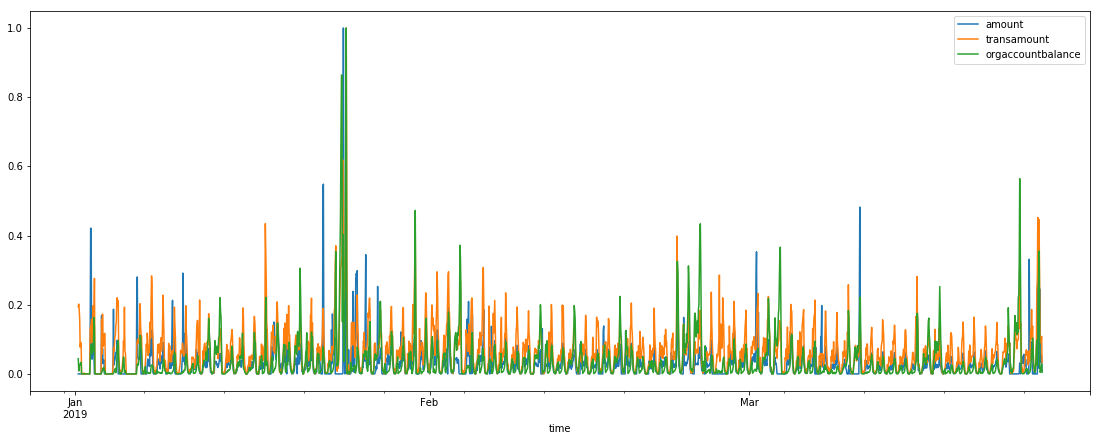

In [83]:
plt.rcParams['figure.figsize']=[19,7]
both.plot()

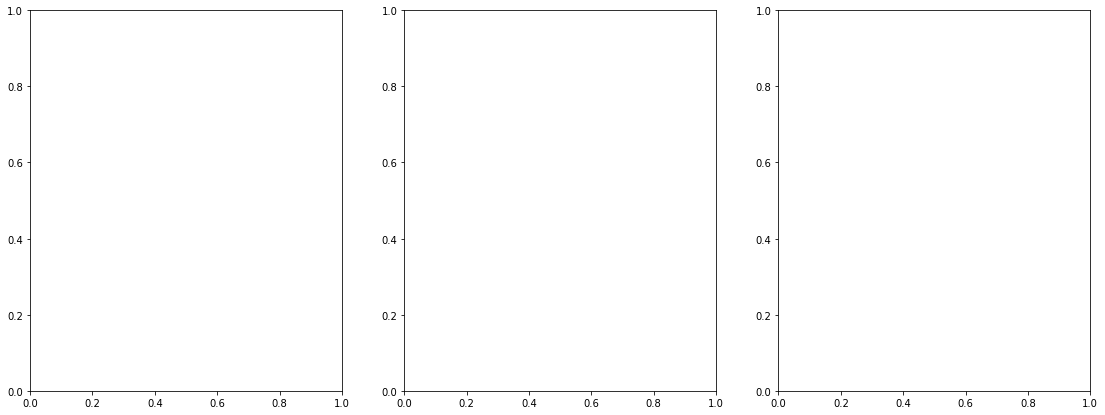

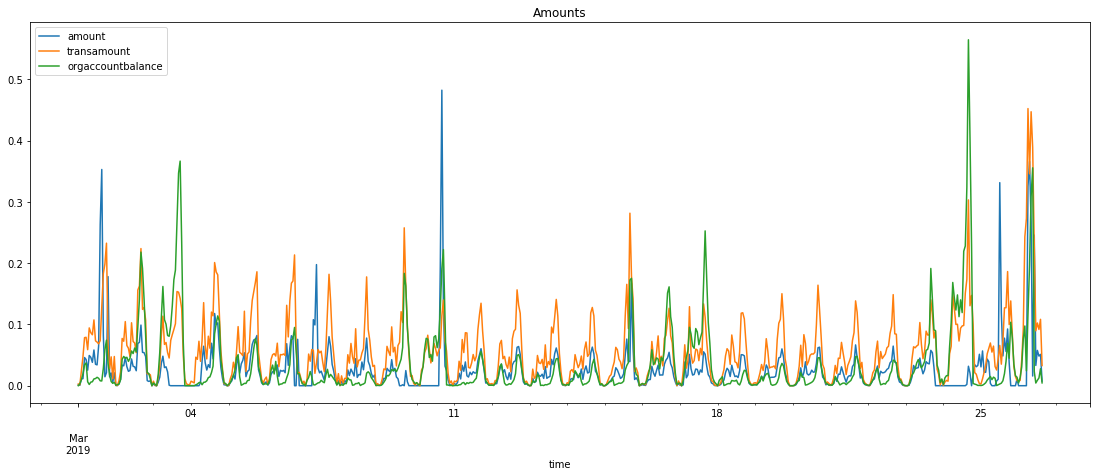

In [84]:
fig,axes = plt.subplots(nrows=1,ncols=3)
both[both.index.month==i].plot(title="Amounts")